<center> <h1>Fatalities in car accidents by miles driven</h1></center>

In [95]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [96]:
df = pd.read_csv("cars_fatalities.csv")
df.head()

,Year,Fatalities,Vehicles,Miles
0,1930,32900,26.7,206
1,1931,33700,26.1,216
2,1932,29500,24.4,200
3,1933,31363,24.2,201
4,1934,36101,25.3,216


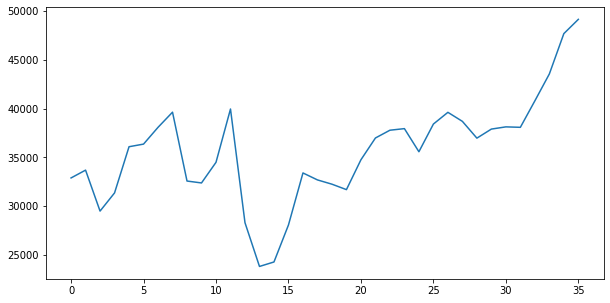

In [97]:
df['Fatalities'].plot(figsize=(10,5))
plt.show()

(array([ 2.,  2.,  2.,  8.,  5., 10.,  4.,  1.,  0.,  2.]),
 array([23823., 26357., 28891., 31425., 33959., 36493., 39027., 41561.,
        44095., 46629., 49163.]),
 <BarContainer object of 10 artists>)

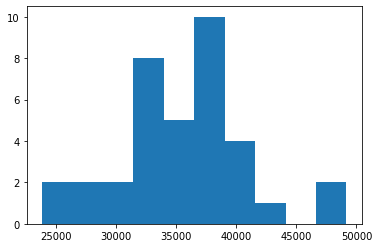

In [98]:
plt.hist(df["Fatalities"], bins = 10)

(array([11.,  5.,  3.,  2.,  2.,  3.,  3.,  3.,  2.,  2.]),
 array([200. , 268.8, 337.6, 406.4, 475.2, 544. , 612.8, 681.6, 750.4,
        819.2, 888. ]),
 <BarContainer object of 10 artists>)

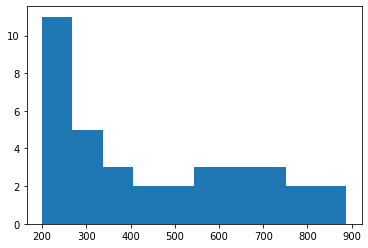

In [99]:
plt.hist(df["Miles"])


In [145]:
model_ppc=CmdStanModel(stan_file='deaths_ppc.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Filip\Desktop\DataAnalysis\Data-Analytics\Project\deaths_ppc.stan to exe file C:\Users\Filip\Desktop\DataAnalysis\Data-Analytics\Project\deaths_ppc.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Filip\Desktop\DataAnalysis\Data-Analytics\Project\deaths_ppc.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Filip/Desktop/DataAnalysis/Data-Analytics/Project/deaths_ppc.hpp C:/Users/Filip/Desktop/DataAnalysis/Data-Analytics/Project/deaths_ppc.stan
Warning in 'C:/Users/Filip/Desktop/DataAnalysis/Data-Analytics/Project/deaths_ppc.stan', line 17, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno-u

In [146]:
R = 1000
fit=model_ppc.sample(data=dict(N = len(df), deaths = df.Fatalities.values), seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                     


INFO:cmdstanpy:CmdStan done processing.


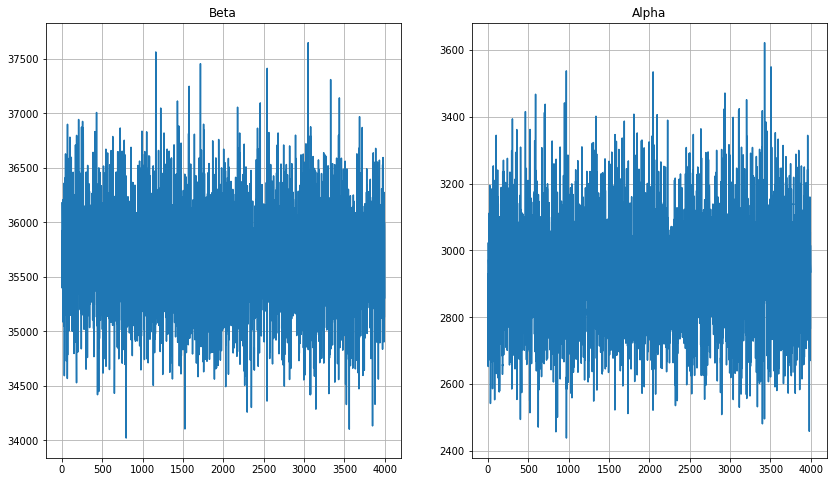

In [147]:
beta = fit.stan_variable('mu')
alpha = fit.stan_variable('sigma')

fig, axes = plt.subplots(1, 2, figsize=(14, 8),sharex=True)
ax=axes[0]
ax.plot(beta)
ax.set_title('Beta')
ax.grid()

ax2=axes[1]
ax2.plot(alpha)
ax2.set_title('Alpha')
ax2.grid()

In [148]:
fit = fit.draws_pd()

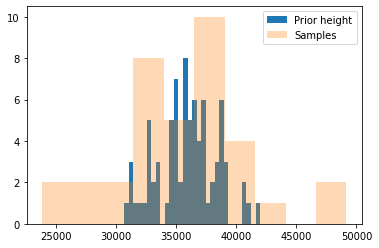

In [154]:
fit['death'][0:80].hist(bins=30)
df['Fatalities'].hist(alpha=0.3)
plt.legend(['Prior height', 'Samples'])
plt.grid()
plt.show()


In [105]:
model_2_fit=CmdStanModel(stan_file='deaths_fit.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Filip\Desktop\DataAnalysis\Data-Analytics\Project\deaths_fit.stan to exe file C:\Users\Filip\Desktop\DataAnalysis\Data-Analytics\Project\deaths_fit.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Filip\Desktop\DataAnalysis\Data-Analytics\Project\deaths_fit.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Filip/Desktop/DataAnalysis/Data-Analytics/Project/deaths_fit.hpp C:/Users/Filip/Desktop/DataAnalysis/Data-Analytics/Project/deaths_fit.stan
Warning in 'C:/Users/Filip/Desktop/DataAnalysis/Data-Analytics/Project/deaths_fit.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno-un

In [106]:
n_val = len(df)
data_fit = {'N' : n_val, 
            'Miles' : df['Miles'][:n_val], 
            'deaths' : df['Fatalities'][:n_val]}

fit=model_2_fit.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


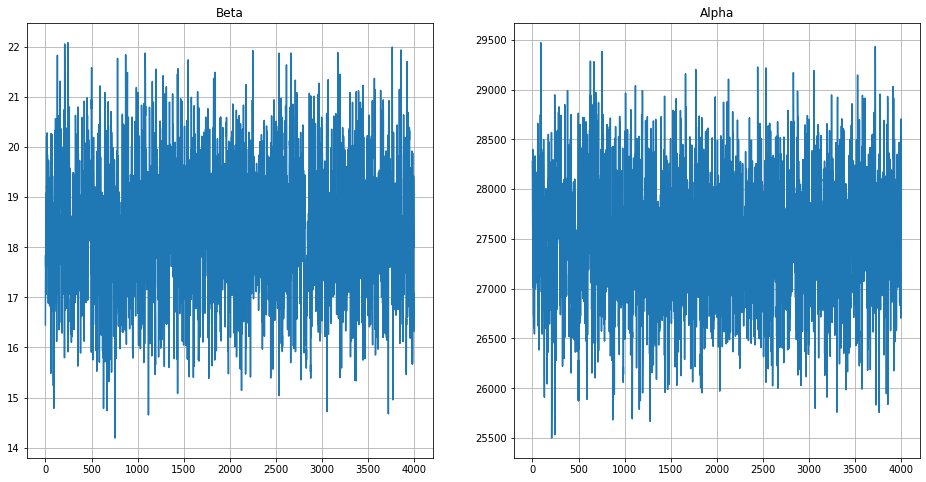

In [107]:
beta = fit.stan_variable('beta')
alpha = fit.stan_variable('alpha')

fig, axes = plt.subplots(1, 2, figsize=(16, 8),sharex=True)
ax=axes[0]
ax.plot(beta)
ax.set_title('Beta')
ax.grid()

ax2=axes[1]
ax2.plot(alpha)
ax2.set_title('Alpha')
ax2.grid()

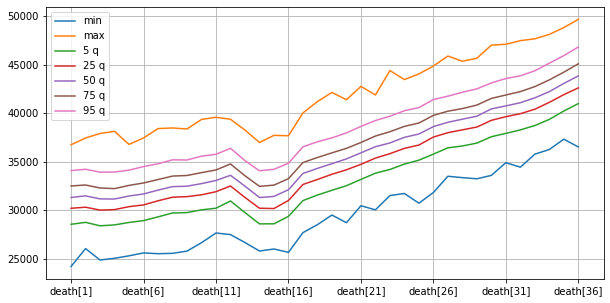

In [108]:
fit_height = fit.draws_pd()
fit_height = fit_height.loc[:,'death[1]':]
data2 = {'min' : fit_height.min(),
        'max' : fit_height.max(),
        '5 q' : fit_height.quantile(0.05),
        '25 q' : fit_height.quantile(0.25),
        '50 q' : fit_height.quantile(0.5),
        '75 q' : fit_height.quantile(0.75),
        '95 q' : fit_height.quantile(0.95)}

fit_data = pd.DataFrame(data2)
fit_data.plot(figsize=(10,5))
plt.grid()

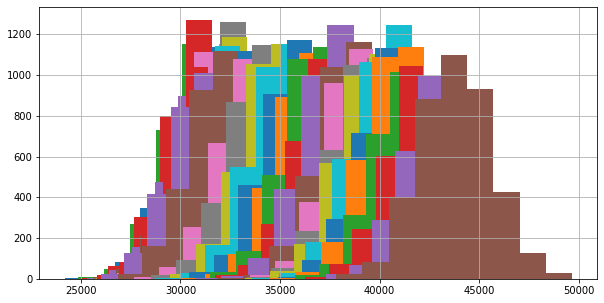

In [109]:
fit_height = fit_height.loc[:,'death[1]':]
for g in fit_height:
    fit_height[g].hist(figsize=(10,5))
plt.show()

In [110]:
model_2_fit=CmdStanModel(stan_file='deaths_fit_w.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Filip\Desktop\DataAnalysis\Data-Analytics\Project\deaths_fit_w.stan to exe file C:\Users\Filip\Desktop\DataAnalysis\Data-Analytics\Project\deaths_fit_w.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Filip\Desktop\DataAnalysis\Data-Analytics\Project\deaths_fit_w.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Filip/Desktop/DataAnalysis/Data-Analytics/Project/deaths_fit_w.hpp C:/Users/Filip/Desktop/DataAnalysis/Data-Analytics/Project/deaths_fit_w.stan
Warning in 'C:/Users/Filip/Desktop/DataAnalysis/Data-Analytics/Project/deaths_fit_w.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitial

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


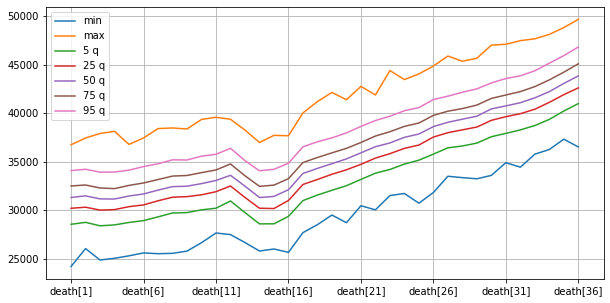

In [111]:
n_val = len(df)
data_fit = {'N' : n_val, 
            'Miles' : df['Miles'][:n_val], 
            'deaths' : df['Fatalities'][:n_val]}

fit2=model_2_fit.sample(data=data_fit,seed=28052020)
fit_height = fit.draws_pd()
fit_height = fit_height.loc[:,'death[1]':]
data2 = {'min' : fit_height.min(),
        'max' : fit_height.max(),
        '5 q' : fit_height.quantile(0.05),
        '25 q' : fit_height.quantile(0.25),
        '50 q' : fit_height.quantile(0.5),
        '75 q' : fit_height.quantile(0.75),
        '95 q' : fit_height.quantile(0.95)}

fit_data = pd.DataFrame(data2)
fit_data.plot(figsize=(10,5))
plt.grid()

c:\Users\Filip\anaconda3\envs\Modelowanie\lib\site-packages\arviz\stats\stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
c:\Users\Filip\anaconda3\envs\Modelowanie\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\Filip\anaconda3\envs\Modelowanie\lib\site-packages\arviz\stats\stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


       rank        waic     p_waic    d_waic    weight         se       dse  \
pred1     0 -389.967789  13.916150  0.000000  0.669725  20.044562  0.000000   
pred2     1 -397.304828  15.310642  7.337038  0.330275  25.297392  8.103835   

       warning waic_scale  
pred1     True        log  
pred2     True        log  


c:\Users\Filip\anaconda3\envs\Modelowanie\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


<AxesSubplot:xlabel='Log'>

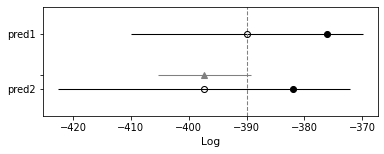

In [112]:
comp_dic = {'pred1': fit , 'pred2': fit2 }
cmp = az.compare(comp_dic, ic = 'waic')
print(cmp)
az.plot_compare(cmp)

DRUGI MODEL


In [89]:
model = CmdStanModel(stan_file = 'poisson_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [90]:
n_val = len(df)
data_fit = {'M' : n_val,
            'miles' : df['Miles'][:n_val],
            'y' : df['Fatalities'][:n_val]
            }

fit3=model.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [91]:
fit_height = fit2.draws_pd()
fit_height = fit_height.loc[:,'y_sim[1]':]
data2 = {'max' : fit_height.max()}

fit_data = pd.DataFrame(data2)
fit_data.plot(figsize=(10,5))
plt.grid()

KeyError: 'y_sim[1]'

<AxesSubplot:>

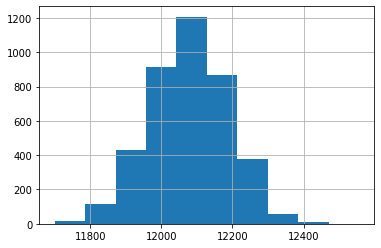

In [ ]:
fit_deaths2 = fit2.draws_pd()
fit_deaths2['y_sim[1]'].hist()